# 一、数据整理

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import torch

filename = "/content/drive/MyDrive/数据挖掘与机器学习/project/heart_attack_prediction_dataset.csv"
data = pd.read_csv(filename)

In [ ]:
data

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [ ]:
data['Blood Pressure'] = data['Blood Pressure'].astype(str)
split_values = data['Blood Pressure'].str.split("/")
data['High Blood Pressure'] = split_values.apply(lambda x: pd.to_numeric(x[0]))
data['Low Blood Pressure'] = split_values.apply(lambda x: pd.to_numeric(x[1]))
data = data.drop('Blood Pressure', axis=1)

data['Unhealthy Diet'] = (data['Diet'] == 'Unhealthy').astype(int)
data['Healthy Diet'] = (data['Diet'] == 'Healthy').astype(int)
data = data.drop('Diet', axis=1)

data['Sex'] = (data['Sex'] == 'Male').astype(int)

In [ ]:
data['Hemisphere'] = (data['Hemisphere'] == 'Northern Hemisphere').astype(int)
data['Africa'] = (data['Continent'] == 'Africa').astype(int)
data['Asia'] = (data['Continent'] == 'Asia').astype(int)
data['Australia'] = (data['Continent'] == 'Australia').astype(int)
data['Europe'] = (data['Continent'] == 'Europe').astype(int)
data['SouthAmerica'] = (data['Continent'] == 'South America').astype(int)
data['Argentina'] = (data['Country'] == 'Argentina').astype(int)
data['Australia1'] = (data['Country'] == 'Australia').astype(int)
data['Brazil'] = (data['Country'] == 'Brazil').astype(int)
data['Canada'] = (data['Country'] == 'Canada').astype(int)
data['China'] = (data['Country'] == 'China').astype(int)
data['Colombia'] = (data['Country'] == 'Colombia').astype(int)
data['France'] = (data['Country'] == 'France').astype(int)
data['Germany'] = (data['Country'] == 'Germany').astype(int)
data['India'] = (data['Country'] == 'India').astype(int)
data['Italy'] = (data['Country'] == 'Italy').astype(int)
data['Japan'] = (data['Country'] == 'Japan').astype(int)
data['NewZealand'] = (data['Country'] == 'New Zealand').astype(int)
data['Nigeria'] = (data['Country'] == 'Nigeria').astype(int)
data['SouthAfrica'] = (data['Country'] == 'South Africa').astype(int)
data['SouthKorea'] = (data['Country'] == 'South Korea').astype(int)
data['Spain'] = (data['Country'] == 'Spain').astype(int)
data['Thailand'] = (data['Country'] == 'Thailand').astype(int)
data['UK'] = (data['Country'] == 'United Kingdom').astype(int)
data['Vietnam'] = (data['Country'] == 'Vietnam').astype(int)

In [ ]:
data

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Italy,Japan,NewZealand,Nigeria,SouthAfrica,SouthKorea,Spain,Thailand,UK,Vietnam
0,BMW7812,67,1,208,72,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CZE1114,21,1,389,98,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,BNI9906,21,0,324,72,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,JLN3497,84,1,383,73,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,GFO8847,66,1,318,93,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,61,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8759,QSV6764,28,0,120,73,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8760,XKA5925,47,1,250,105,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8761,EPE6801,36,1,178,60,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(data)
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use',
       'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'High Blood Pressure', 'Low Blood Pressure',
       'Unhealthy Diet', 'Healthy Diet', 'Africa', 'Asia', 'Australia',
       'Europe', 'SouthAmerica', 'Argentina', 'Australia1', 'Brazil', 'Canada',
       'China', 'Colombia', 'France', 'Germany', 'India', 'Italy', 'Japan',
       'NewZealand', 'Nigeria', 'SouthAfrica', 'SouthKorea', 'Spain',
       'Thailand', 'UK', 'Vietnam'],
      dtype='object')

In [ ]:
X = data.drop(columns=["Patient ID", "Country", "Continent", "Hemisphere", "Heart Attack Risk"])
y = data["Heart Attack Risk"]

In [ ]:
y = y.values

# 2、深度学习模型

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from imblearn.over_sampling import SMOTE

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ExponentialLR
import torch.nn.functional as F

class SHXNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, hidden_size9):
        super(SHXNN, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.1)

        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.1)

        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.bn3 = nn.BatchNorm1d(hidden_size3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=0.1)

        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.bn4 = nn.BatchNorm1d(hidden_size4)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(p=0.1)

        self.fc5 = nn.Linear(hidden_size4, hidden_size5)
        self.bn5 = nn.BatchNorm1d(hidden_size5)
        self.relu5 = nn.ReLU()
        self.dropout5 = nn.Dropout(p=0.1)

        self.fc6 = nn.Linear(hidden_size5, hidden_size6)
        self.bn6 = nn.BatchNorm1d(hidden_size6)
        self.relu6 = nn.ReLU()
        self.dropout6 = nn.Dropout(p=0.1)

        self.fc7 = nn.Linear(hidden_size6, hidden_size7)
        self.bn7 = nn.BatchNorm1d(hidden_size7)
        self.relu7 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=0.1)

        self.fc8 = nn.Linear(hidden_size7, hidden_size8)
        self.bn8 = nn.BatchNorm1d(hidden_size8)
        self.relu8 = nn.ReLU()
        self.dropout8 = nn.Dropout(p=0.1)

        self.fc9 = nn.Linear(hidden_size8, hidden_size9)
        self.bn9 = nn.BatchNorm1d(hidden_size9)
        self.relu9 = nn.ReLU()
        self.dropout9 = nn.Dropout(p=0.1)

        self.fc10 = nn.Linear(hidden_size9, 1)
        self.sigmoid = nn.Sigmoid()

        # 使用更现代的权重初始化方法
        nn.init.kaiming_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight)
        nn.init.kaiming_uniform_(self.fc3.weight)
        nn.init.kaiming_uniform_(self.fc4.weight)
        nn.init.kaiming_uniform_(self.fc5.weight)
        nn.init.xavier_uniform_(self.fc6.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout4(x)

        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu5(x)
        x = self.dropout5(x)

        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu6(x)
        x = self.dropout6(x)

        x = self.fc7(x)
        x = self.bn7(x)
        x = self.relu7(x)
        x = self.dropout7(x)

        x = self.fc8(x)
        x = self.bn8(x)
        x = self.relu8(x)
        x = self.dropout8(x)

        x = self.fc9(x)
        x = self.bn9(x)
        x = self.relu9(x)
        x = self.dropout9(x)

        x = self.fc10(x)
        x = self.sigmoid(x)

        return x


# 归一化输入数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_size = X_train_scaled.shape[1]
hidden_size1 = 128
hidden_size2 = 256
hidden_size3 = 512
hidden_size4 = 1024
hidden_size5 = 512
hidden_size6 = 256
hidden_size7 = 128
hidden_size8 = 64
hidden_size9 = 16

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

model = SHXNN(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, hidden_size5, hidden_size6, hidden_size7, hidden_size8, hidden_size9)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 学习率调度器
scheduler = ExponentialLR(optimizer, gamma=0.9)

num_epochs = 100
batch_size = 256

for epoch in range(num_epochs):
    # 批量训练
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y.view(-1, 1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 调整学习率
    scheduler.step()

    # 在每个epoch结束时输出损失
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.5014
Epoch [2/100], Loss: 0.5113
Epoch [3/100], Loss: 0.5198
Epoch [4/100], Loss: 0.5222
Epoch [5/100], Loss: 0.5218
Epoch [6/100], Loss: 0.5136
Epoch [7/100], Loss: 0.5146
Epoch [8/100], Loss: 0.5100
Epoch [9/100], Loss: 0.5150
Epoch [10/100], Loss: 0.5031
Epoch [11/100], Loss: 0.5163
Epoch [12/100], Loss: 0.5019
Epoch [13/100], Loss: 0.5011
Epoch [14/100], Loss: 0.4990
Epoch [15/100], Loss: 0.4999
Epoch [16/100], Loss: 0.4959
Epoch [17/100], Loss: 0.4944
Epoch [18/100], Loss: 0.4900
Epoch [19/100], Loss: 0.4940
Epoch [20/100], Loss: 0.4902
Epoch [21/100], Loss: 0.4921
Epoch [22/100], Loss: 0.4867
Epoch [23/100], Loss: 0.4908
Epoch [24/100], Loss: 0.4825
Epoch [25/100], Loss: 0.4857
Epoch [26/100], Loss: 0.4827
Epoch [27/100], Loss: 0.4827
Epoch [28/100], Loss: 0.4807
Epoch [29/100], Loss: 0.4815
Epoch [30/100], Loss: 0.4830
Epoch [31/100], Loss: 0.4830
Epoch [32/100], Loss: 0.4864
Epoch [33/100], Loss: 0.4756
Epoch [34/100], Loss: 0.4787
Epoch [35/100], Loss: 0

In [ ]:
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    threshold = 0.5
    y_pred_binary = (test_predictions > threshold).astype(int)

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71      1125
           1       0.37      0.22      0.28       628

    accuracy                           0.59      1753
   macro avg       0.51      0.51      0.49      1753
weighted avg       0.55      0.59      0.56      1753



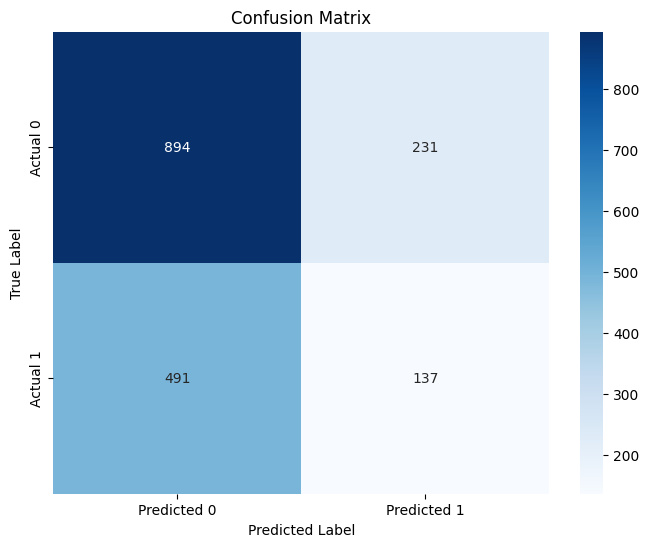

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
test_predictions

array([[0.0337928 ],
       [0.51293474],
       [0.20254542],
       ...,
       [0.85754055],
       [0.19049512],
       [0.01431856]], dtype=float32)